In [1]:
# Step 1: Load the Dataset & Explore It

import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv("heart.csv")

# Show the shape of the dataset (rows, columns)
print(f"Dataset shape: {df.shape}")

# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check how many duplicate rows exist
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Display first 5 rows to get a basic understanding of the structure
df.head()


Dataset shape: (1025, 14)

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Number of duplicate rows: 723


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
# Step 2: Data Cleaning

# Check how many duplicate rows exist in the dataset
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicates only if they exist
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed successfully.")
else:
    print("No duplicate rows found. Dataset is already clean.")

# Check the new shape of the dataset after cleaning
print(f"Shape after cleaning: {df.shape}")

# Display first 5 rows to confirm everything looks good
df.head()


Number of duplicate rows: 723
Duplicate rows removed successfully.
Shape after cleaning: (302, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Step 3.1: Encode categorical columns using one-hot encoding

# Create a copy of the original dataframe to avoid changing it directly
df_encoded = df.copy()

# List of columns to encode
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Show the new shape and first few rows
print(f"Shape after encoding: {df_encoded.shape}")
df_encoded.head()


Shape after encoding: (302, 20)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,1,0,0,1,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,1,0,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,1,0,1,0,0,1,0


In [4]:
# Step 3.2: Feature Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler

# Create a copy to scale without touching original
df_scaled = df_encoded.copy()

# Define the feature columns (excluding the target column)
X = df_scaled.drop('target', axis=1)

# Save the target separately
y = df_scaled['target']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Show the scaled feature data
X_scaled.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,-0.267966,0.682656,-0.376556,-0.667728,-0.418446,0.806035,-0.698344,-0.037124,1.274980,-0.445435,-0.63099,-0.287119,1.0,-0.115857,-0.929622,1.068571,-0.251754,-1.097442,1.257456
1,-0.157260,0.682656,0.478910,-0.841918,2.389793,0.237495,1.431958,1.773958,-0.714911,-0.445435,-0.63099,-0.287119,-1.0,-0.115857,-0.929622,-0.935829,-0.251754,-1.097442,1.257456
2,1.724733,0.682656,0.764066,-1.403197,-0.418446,-1.074521,1.431958,1.342748,-0.714911,-0.445435,-0.63099,-0.287119,1.0,-0.115857,-0.929622,-0.935829,-0.251754,-1.097442,1.257456
3,0.728383,0.682656,0.935159,-0.841918,-0.418446,0.499898,-0.698344,-0.899544,0.280034,-0.445435,-0.63099,-0.287119,1.0,-0.115857,-0.929622,1.068571,-0.251754,-1.097442,1.257456
4,0.839089,-1.464866,0.364848,0.919336,2.389793,-1.905464,-0.698344,0.739054,2.269926,-0.445435,-0.63099,-0.287119,1.0,-0.115857,1.075706,-0.935829,-0.251754,0.911210,-0.795256


In [5]:
# Step 4.1: Train-Test Split & Model Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Models trained successfully.")


Models trained successfully.


In [6]:
# Step 4.2: Evaluate both models on the test data

# Logistic Regression Predictions
log_preds = log_model.predict(X_test)

# Random Forest Predictions
rf_preds = rf_model.predict(X_test)

print("Logistic Regression Evaluation:\n")
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))

print("\nRandom Forest Evaluation:\n")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Logistic Regression Evaluation:

[[21 11]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        32
           1       0.69      0.83      0.75        29

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61


Random Forest Evaluation:

[[23  9]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.82


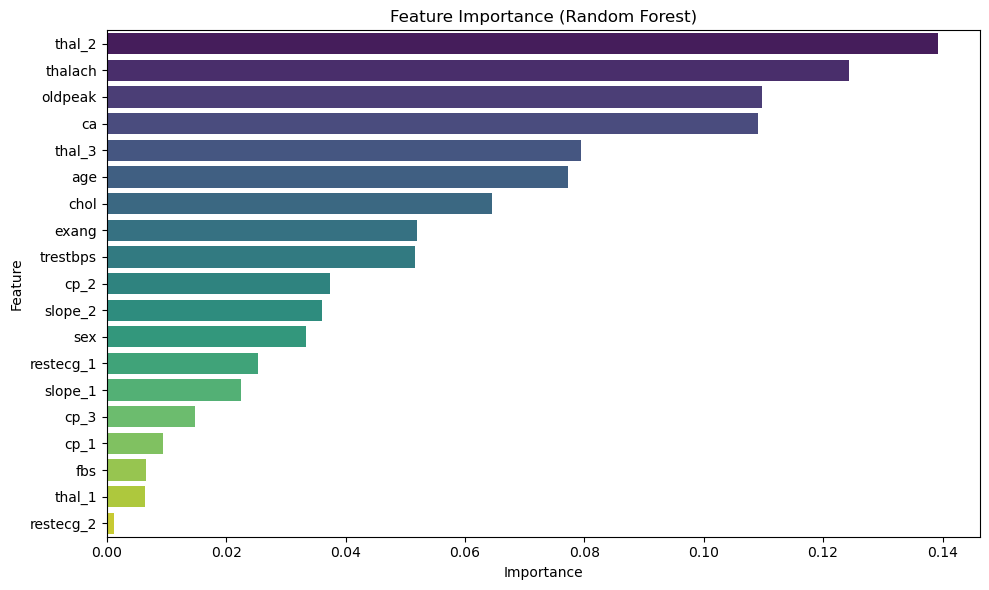

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use best estimator from GridSearch
best_rf = grid_search.best_estimator_

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create DataFrame for plotting
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


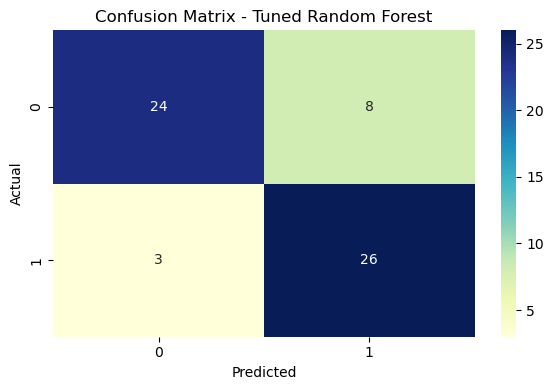

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using best model
best_preds = best_rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, best_preds)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Load and clean data
df = pd.read_csv("heart.csv")
df = df.drop_duplicates()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=["cp", "restecg", "slope", "thal"], drop_first=True)

# Define features and target
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

# Save model and scaler
joblib.dump(model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']